In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import plot
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('../../case data/australia rain/weatherAUS.csv',usecols=['MaxTemp','Rainfall','RainTomorrow'])
data

,MaxTemp,Rainfall,RainTomorrow
0,22.9,0.6,No
1,25.1,0.0,No
2,25.7,0.0,No
3,28.0,0.0,No
4,32.3,1.0,No
...,...,...,...
145455,23.4,0.0,No
145456,25.3,0.0,No
145457,26.9,0.0,No
145458,27.0,0.0,No


In [3]:
data.dropna(inplace=True)
train,test = train_test_split(data,test_size=0.2,random_state=64)
train.shape,test.shape

((112384, 3), (28096, 3))

In [4]:
train.isna().sum()

MaxTemp         0
Rainfall        0
RainTomorrow    0
dtype: int64

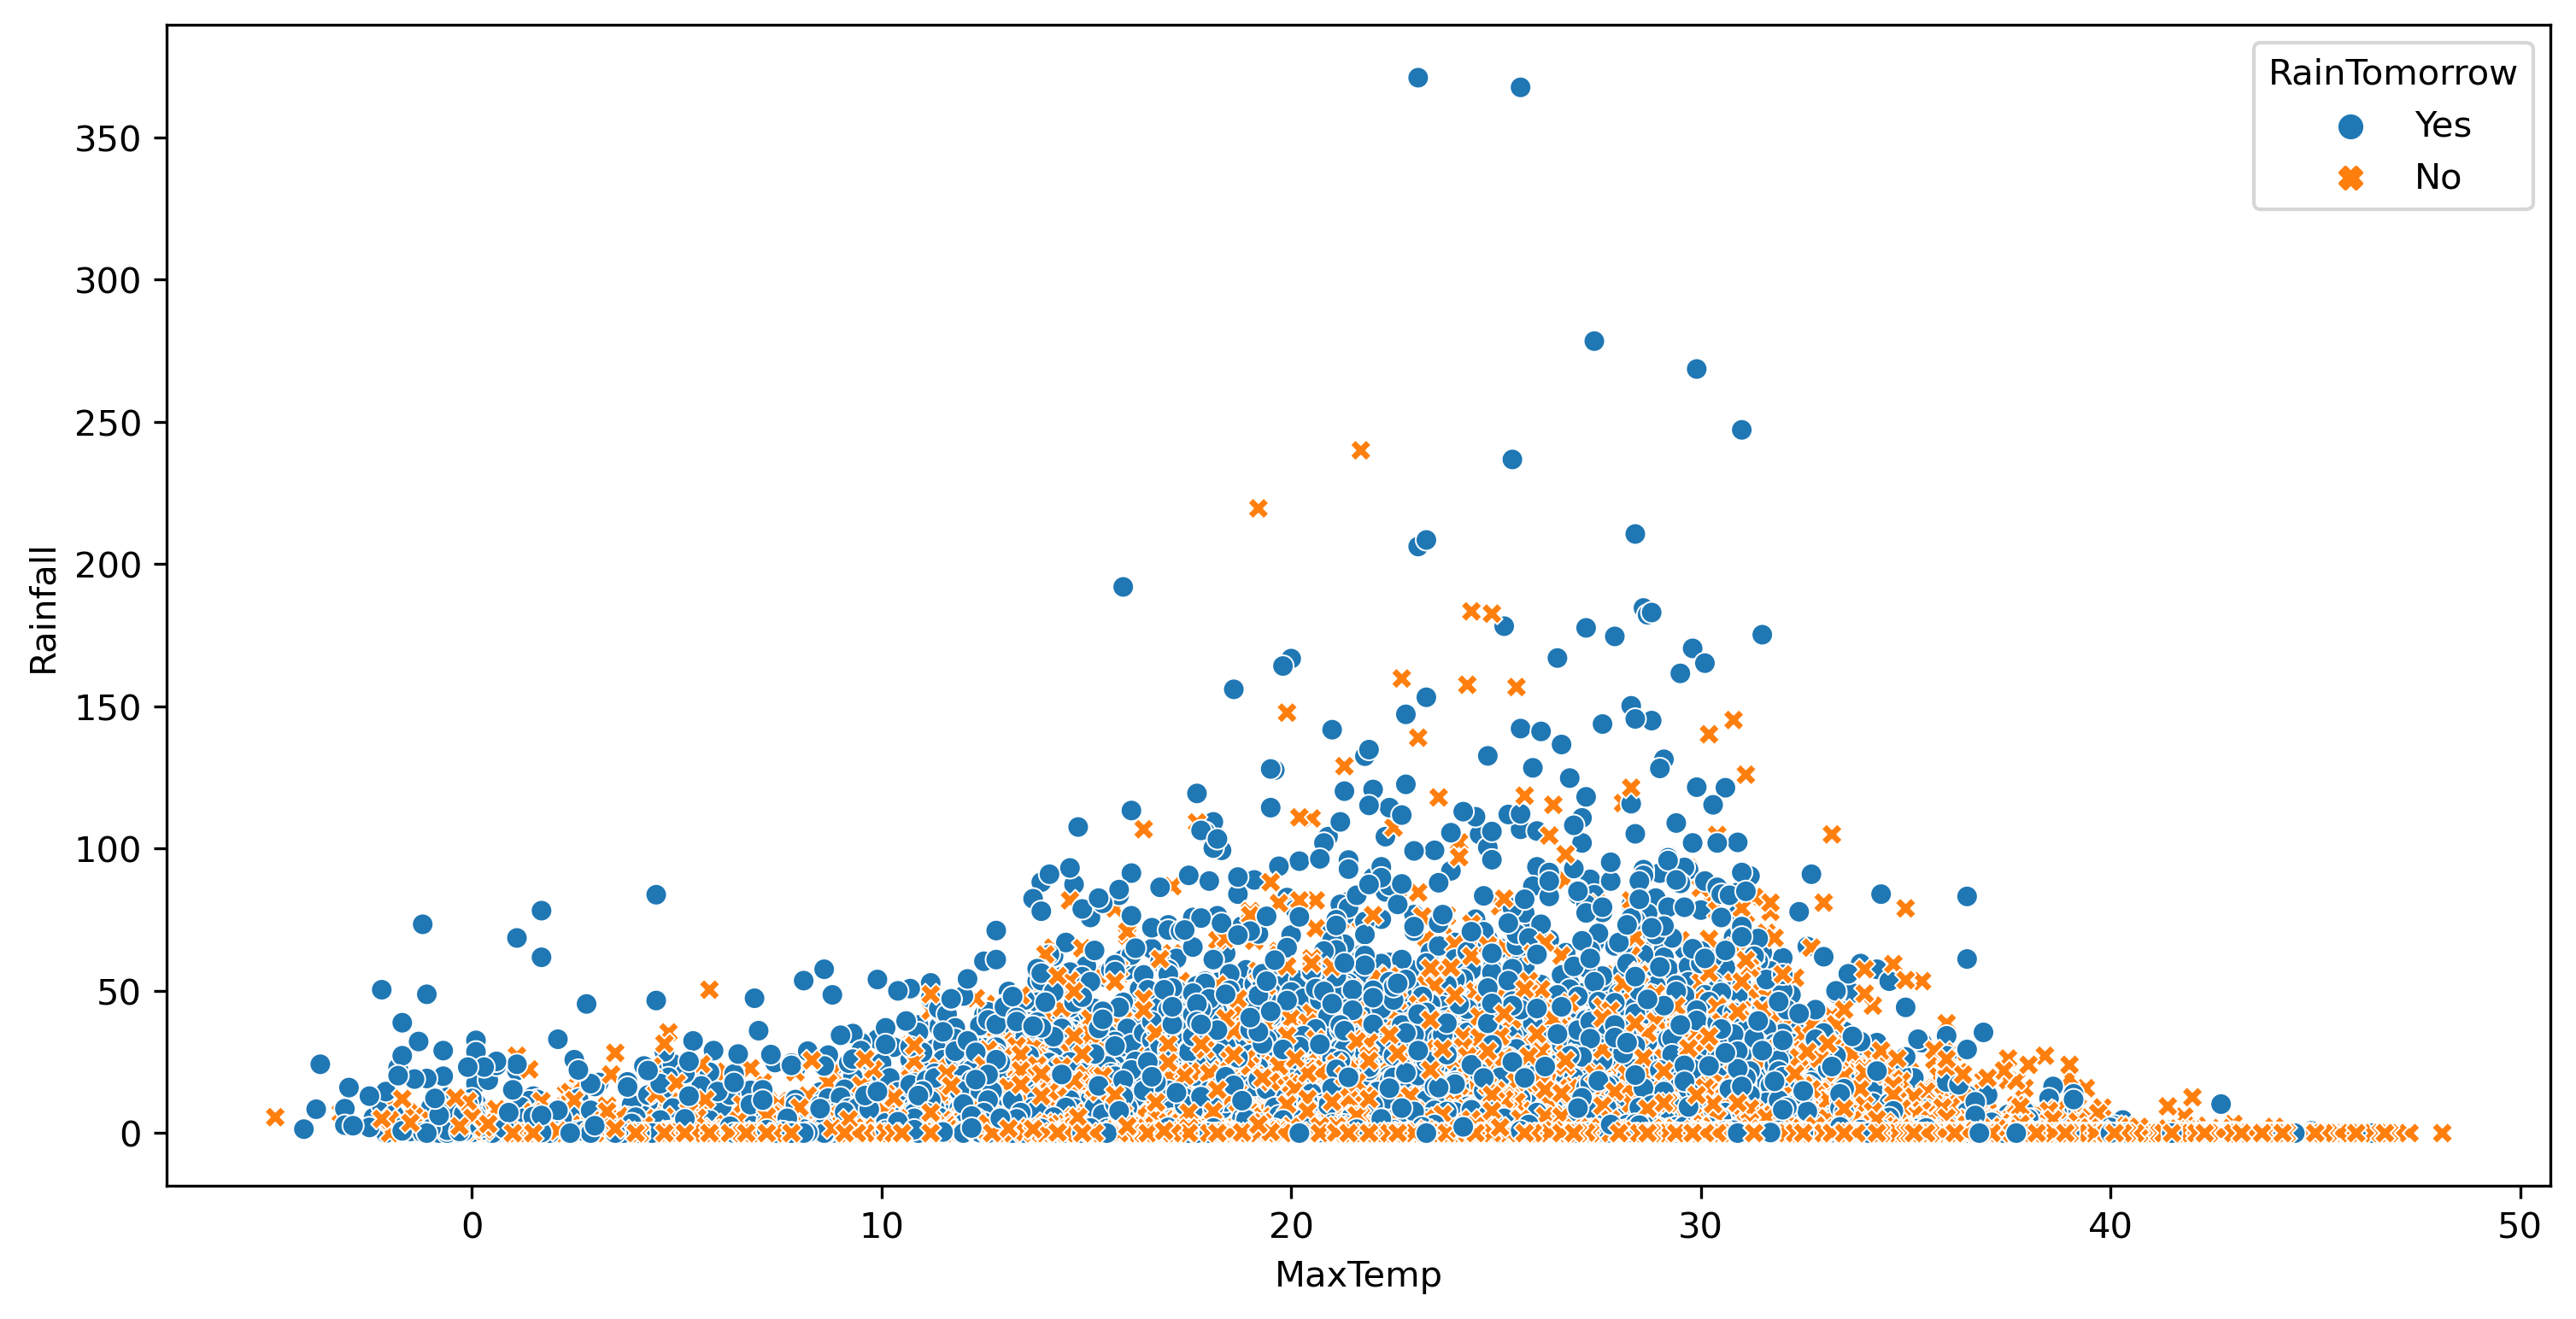

In [5]:
plt.figure(figsize=[12,6],dpi=300)
sns.scatterplot(x=train.MaxTemp,y=train.Rainfall,hue=train.RainTomorrow,style=train.RainTomorrow)
plt.show()

In [6]:
from regression import LinearRegression
model = LinearRegression()
m,c = model.fit(train['MaxTemp'].values.reshape(-1,1),train['Rainfall'])
m,c

(-0.09082758900659944, 4.4455041898781715)

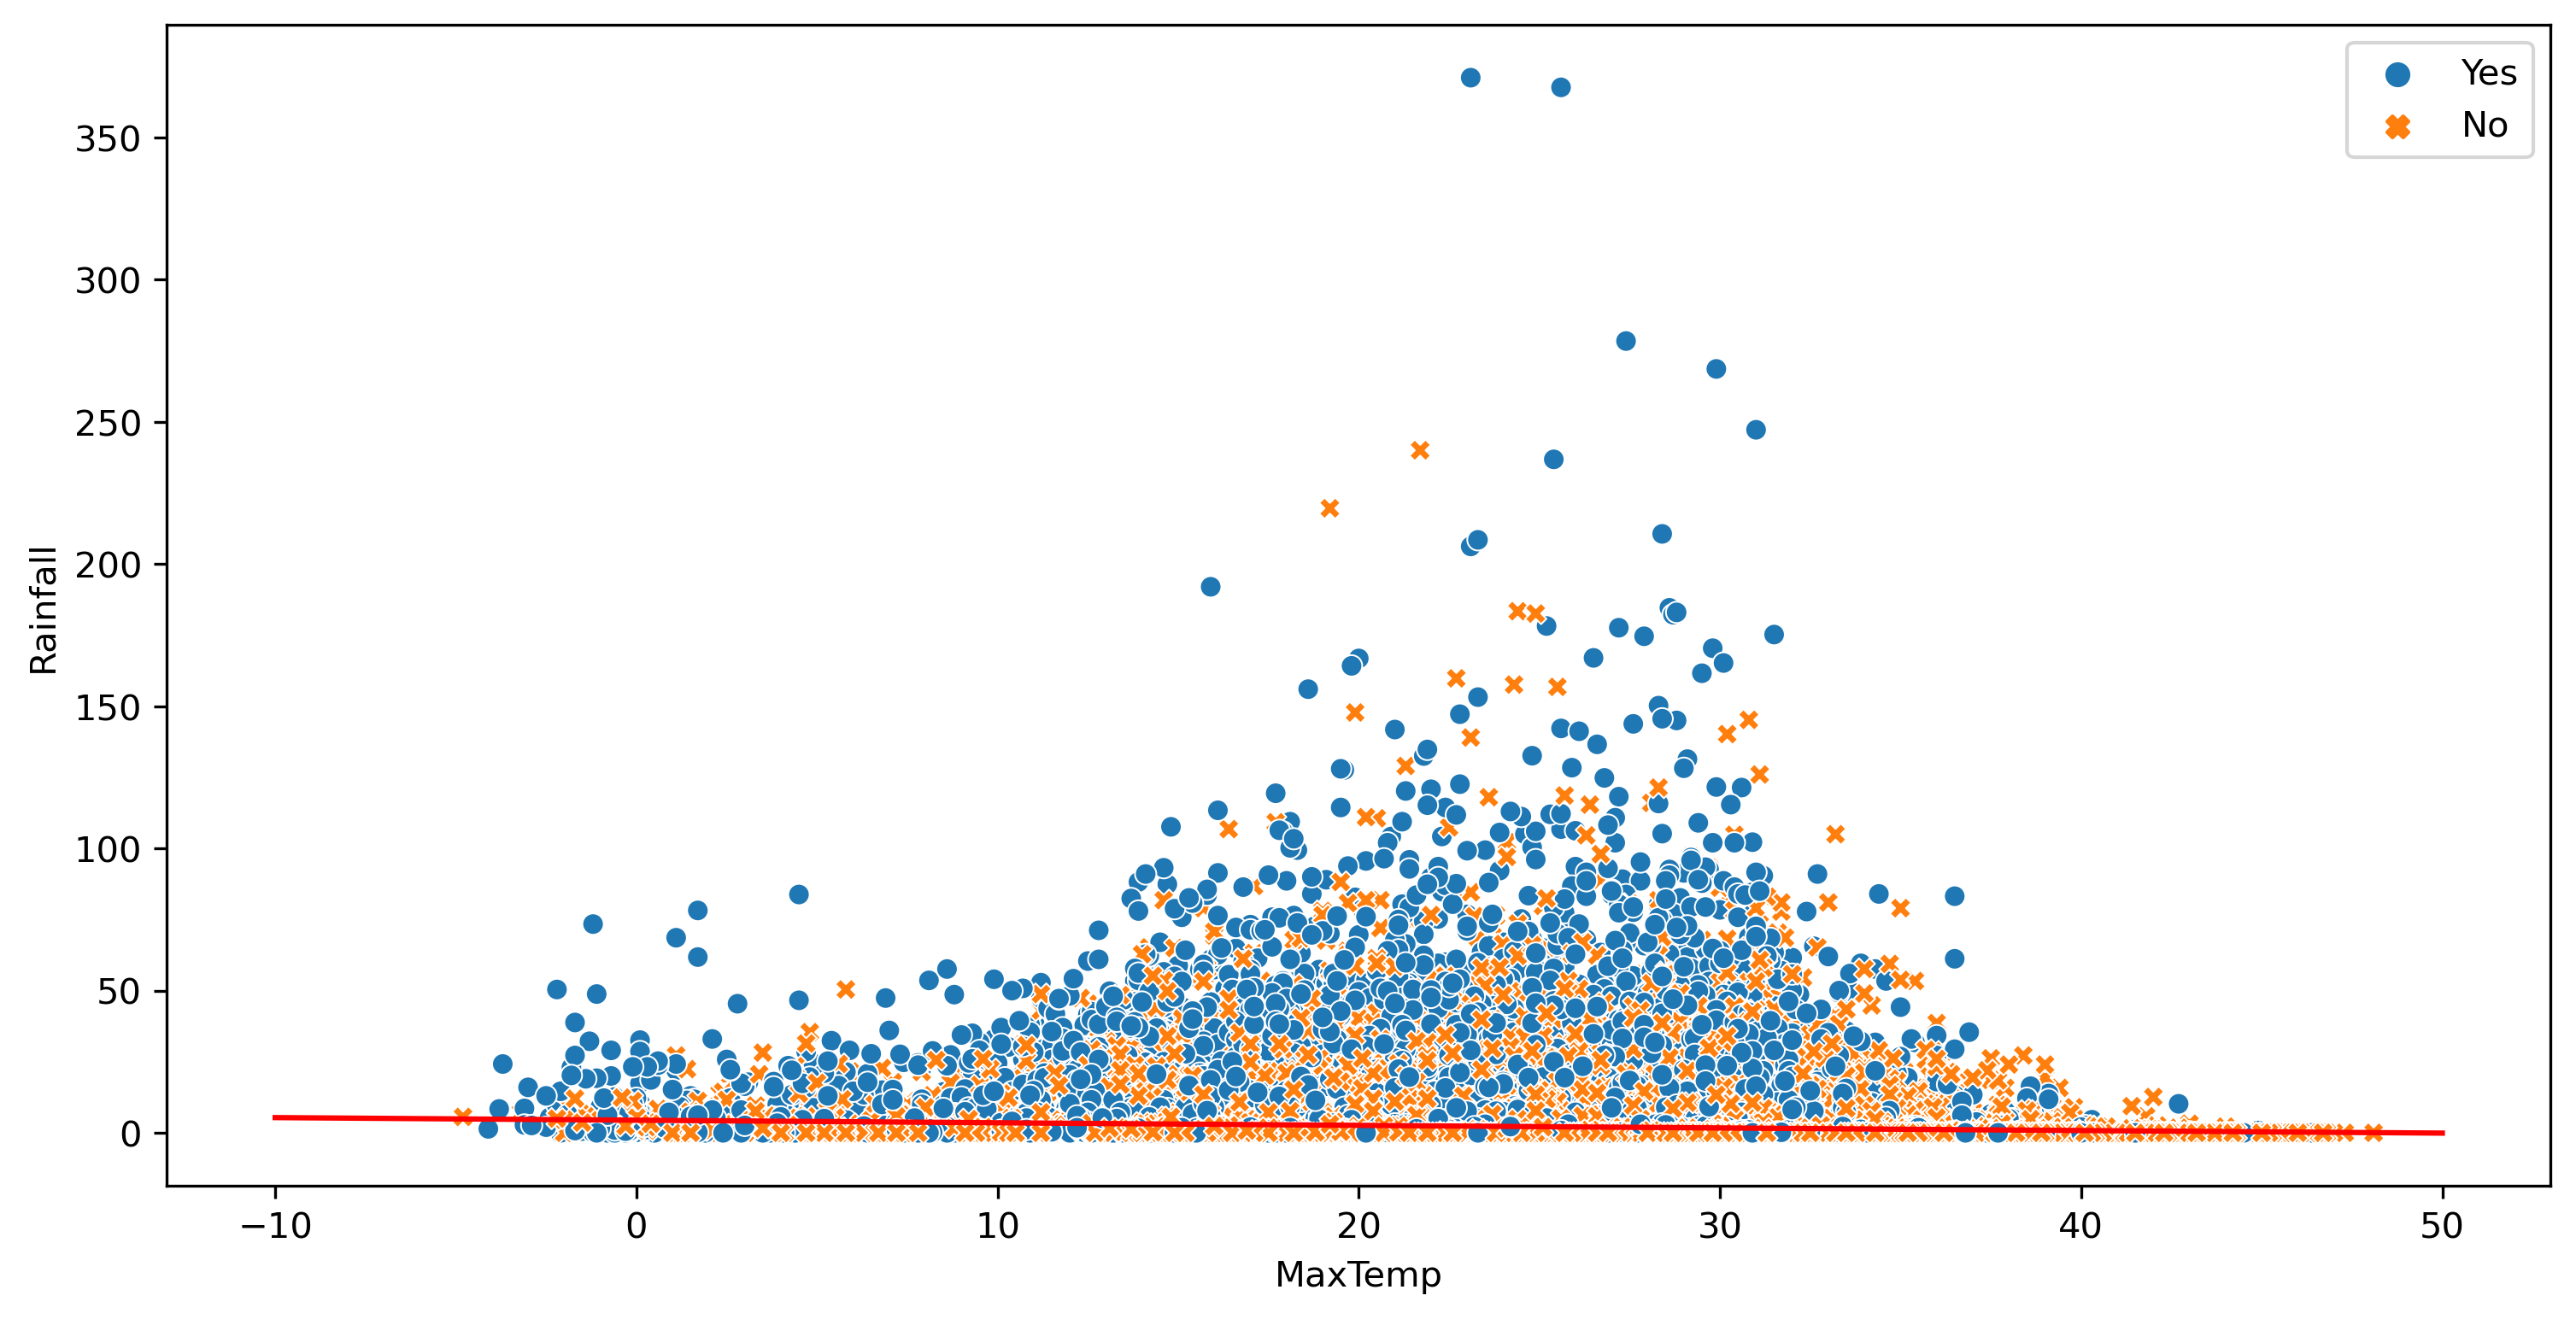

In [7]:
x = np.linspace(-10,50)
y= model.predict(x.reshape(-1,1))

plt.figure(figsize=[12,6],dpi=300)
sns.scatterplot(x=train.MaxTemp,y=train.Rainfall,hue=train.RainTomorrow,style=train.RainTomorrow)
sns.lineplot(x=x,y=y,color='r')
plt.show()

In [8]:
predicted_rainfall = model.predict(test['MaxTemp'].values.reshape(-1,1))
label = []
for y,y_pred in zip(test['Rainfall'],predicted_rainfall):
    if y <= y_pred:
        label.append('No')
    else:
        label.append('Yes')

test['label'] = label
test

c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,MaxTemp,Rainfall,RainTomorrow,label
111874,14.4,11.0,No,Yes
109289,22.8,0.0,No,No
86635,30.8,0.0,No,No
6160,24.6,0.0,No,No
82586,15.3,6.4,Yes,Yes
...,...,...,...,...
64691,17.5,0.2,No,No
63144,13.3,0.0,No,No
44086,19.0,0.0,No,No
73319,27.9,0.0,No,No


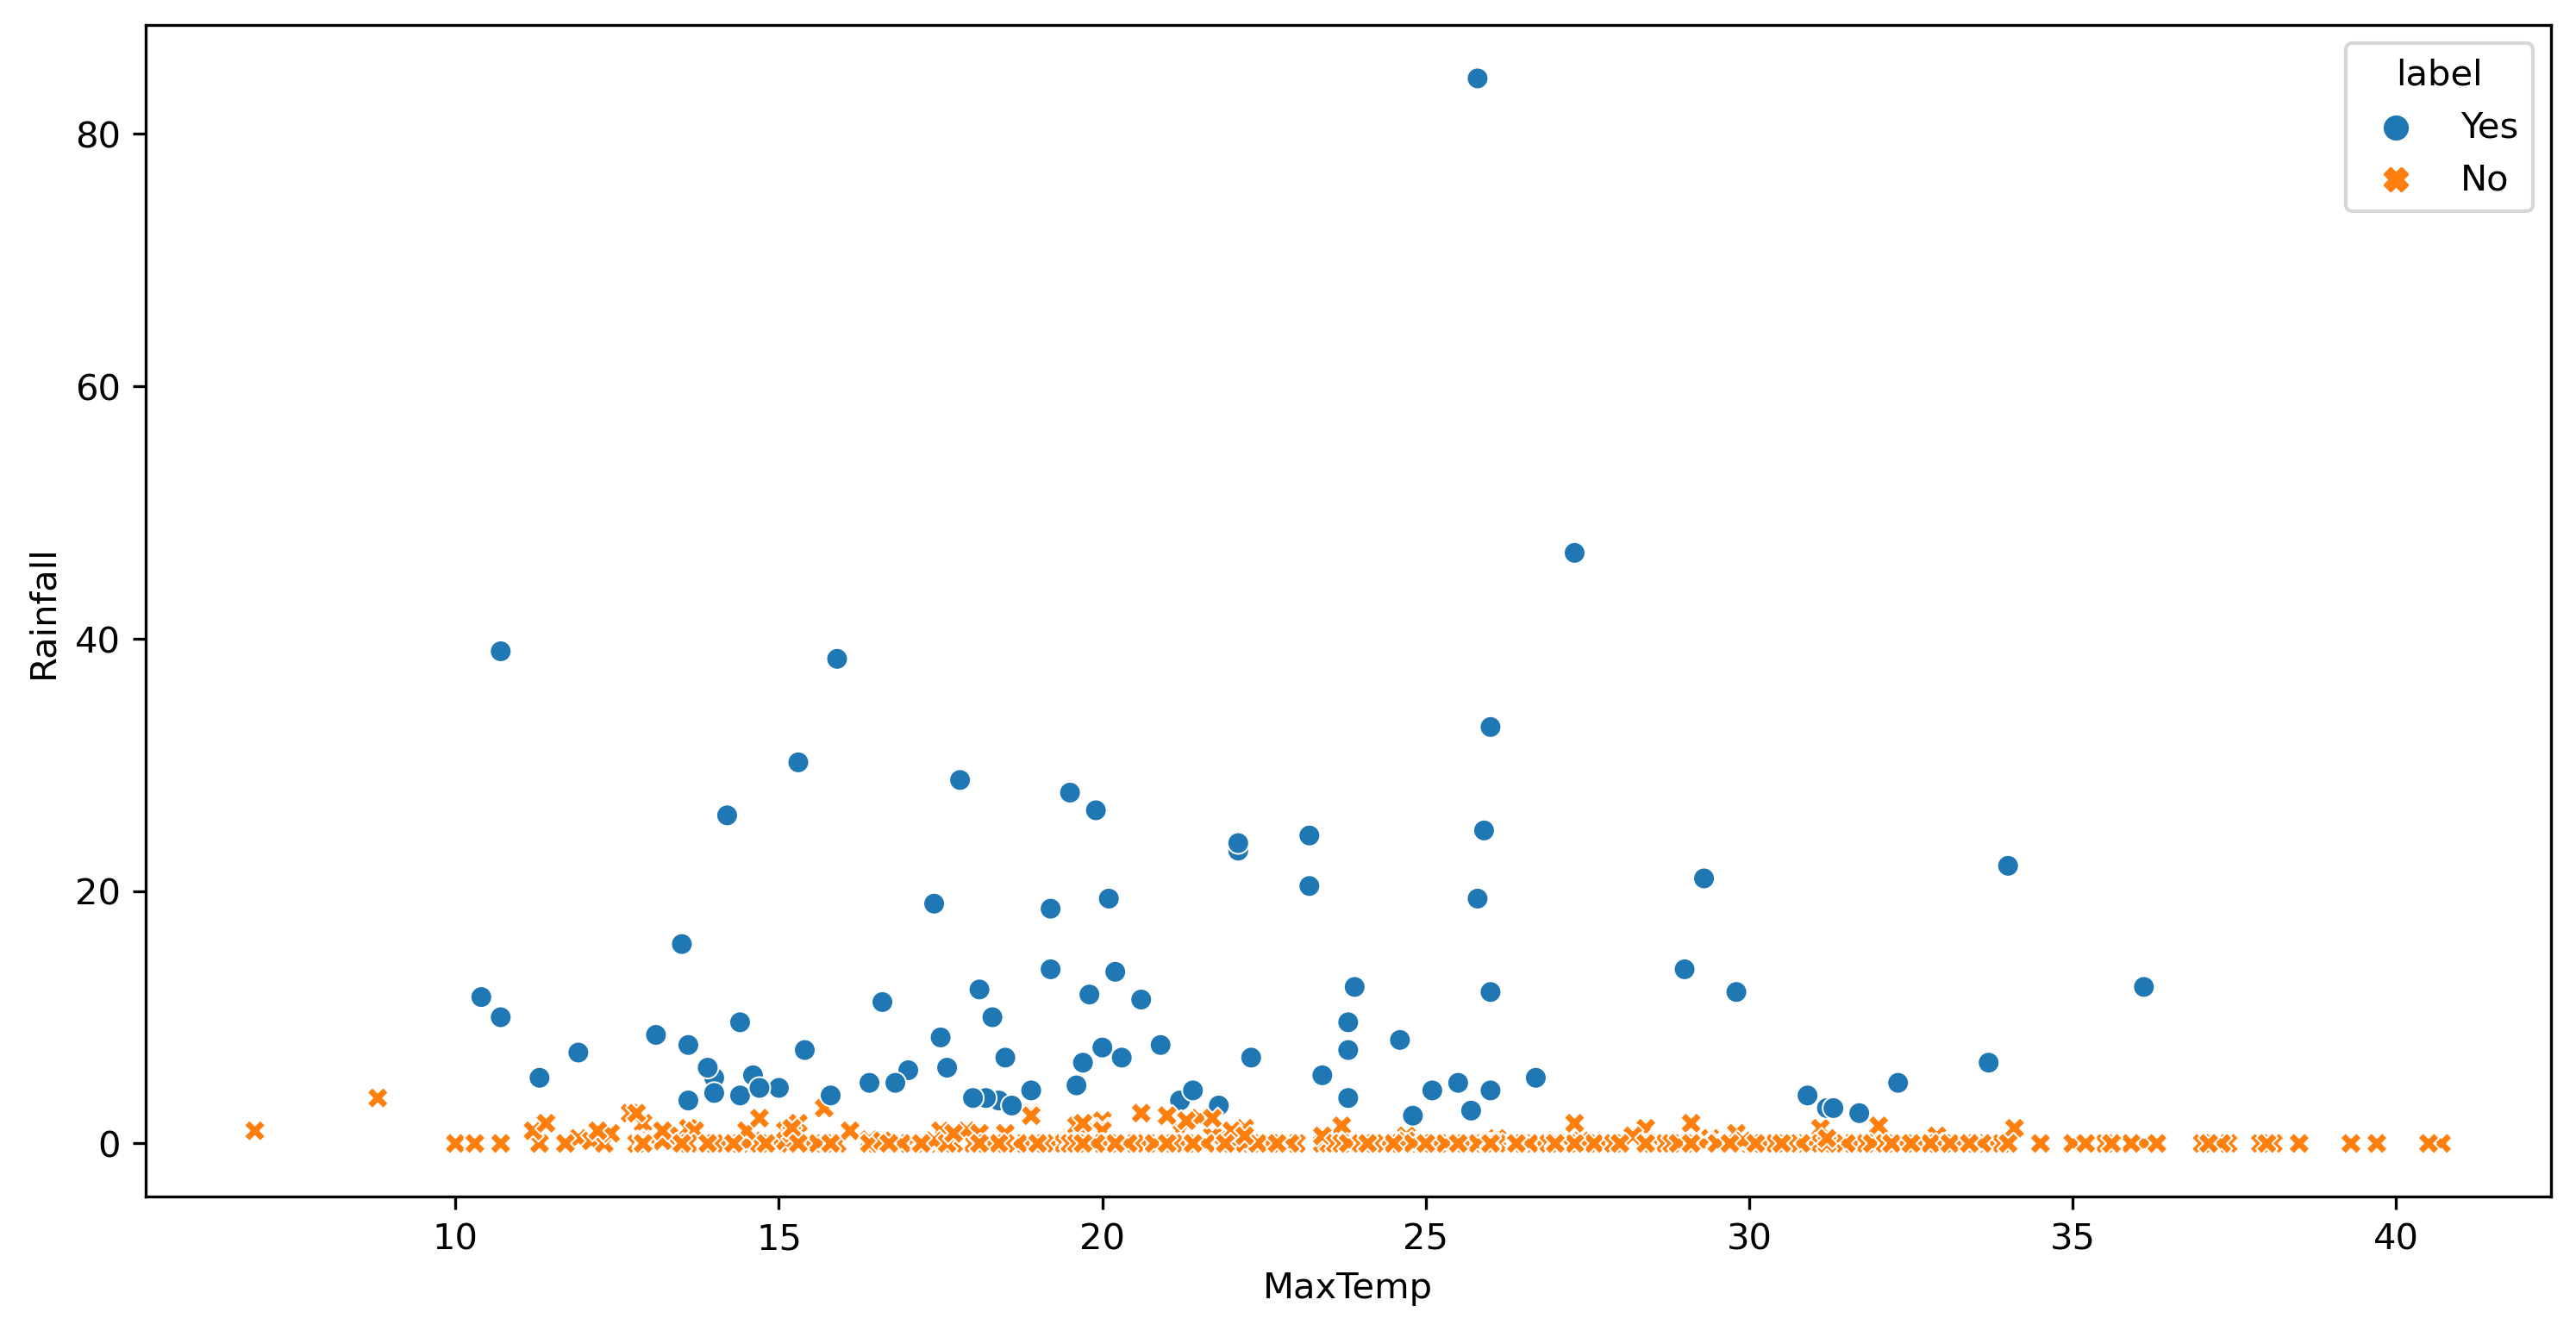

In [9]:
sample = test.sample(500,random_state=64)
plt.figure(figsize=[12,6],dpi=300)
sns.scatterplot(x=sample.MaxTemp,y=sample.Rainfall,hue=sample.label,style=sample.label)
plt.show()

In [10]:
np.mean(test.RainTomorrow == test.label)*100

77.47366173120729

In [11]:
np.zeros(train[['Rainfall','MaxTemp']].shape[1] + 1).shape

(3,)

In [12]:
np.hstack([train[['Rainfall','MaxTemp']], np.ones((train[['Rainfall','MaxTemp']].shape[0], 1))]).shape

(112384, 3)

In [13]:
def minmax_normalizer(dataframe):
    norm_data = pd.DataFrame()
    for col in dataframe:
        col_min = np.min(dataframe[col])
        col_max = np.max(dataframe[col])
        norm_data[col] = (dataframe[col] - col_min)/(col_max - col_min)

    return norm_data

y = train['RainTomorrow'].apply(lambda x: 1 if x == 'Yes' else 0)
x = minmax_normalizer(train[['Rainfall','MaxTemp']])

In [14]:
x

,Rainfall,MaxTemp
135697,0.017251,0.362949
38574,0.000000,0.608696
71462,0.000000,0.680529
62041,0.011321,0.368620
120449,0.000000,0.620038
...,...,...
132796,0.000539,0.446125
51310,0.004313,0.338374
91770,0.005930,0.548204
90596,0.000000,0.682420


In [15]:
y

135697    1
38574     0
71462     0
62041     0
120449    0
         ..
132796    0
51310     0
91770     1
90596     0
40848     0
Name: RainTomorrow, Length: 112384, dtype: int64

In [16]:
from regression import LogisticRegression
model = LogisticRegression()
model.fit(x,y,0.01,4500)

array([ 0.09501304, -0.77800728, -0.86336469])

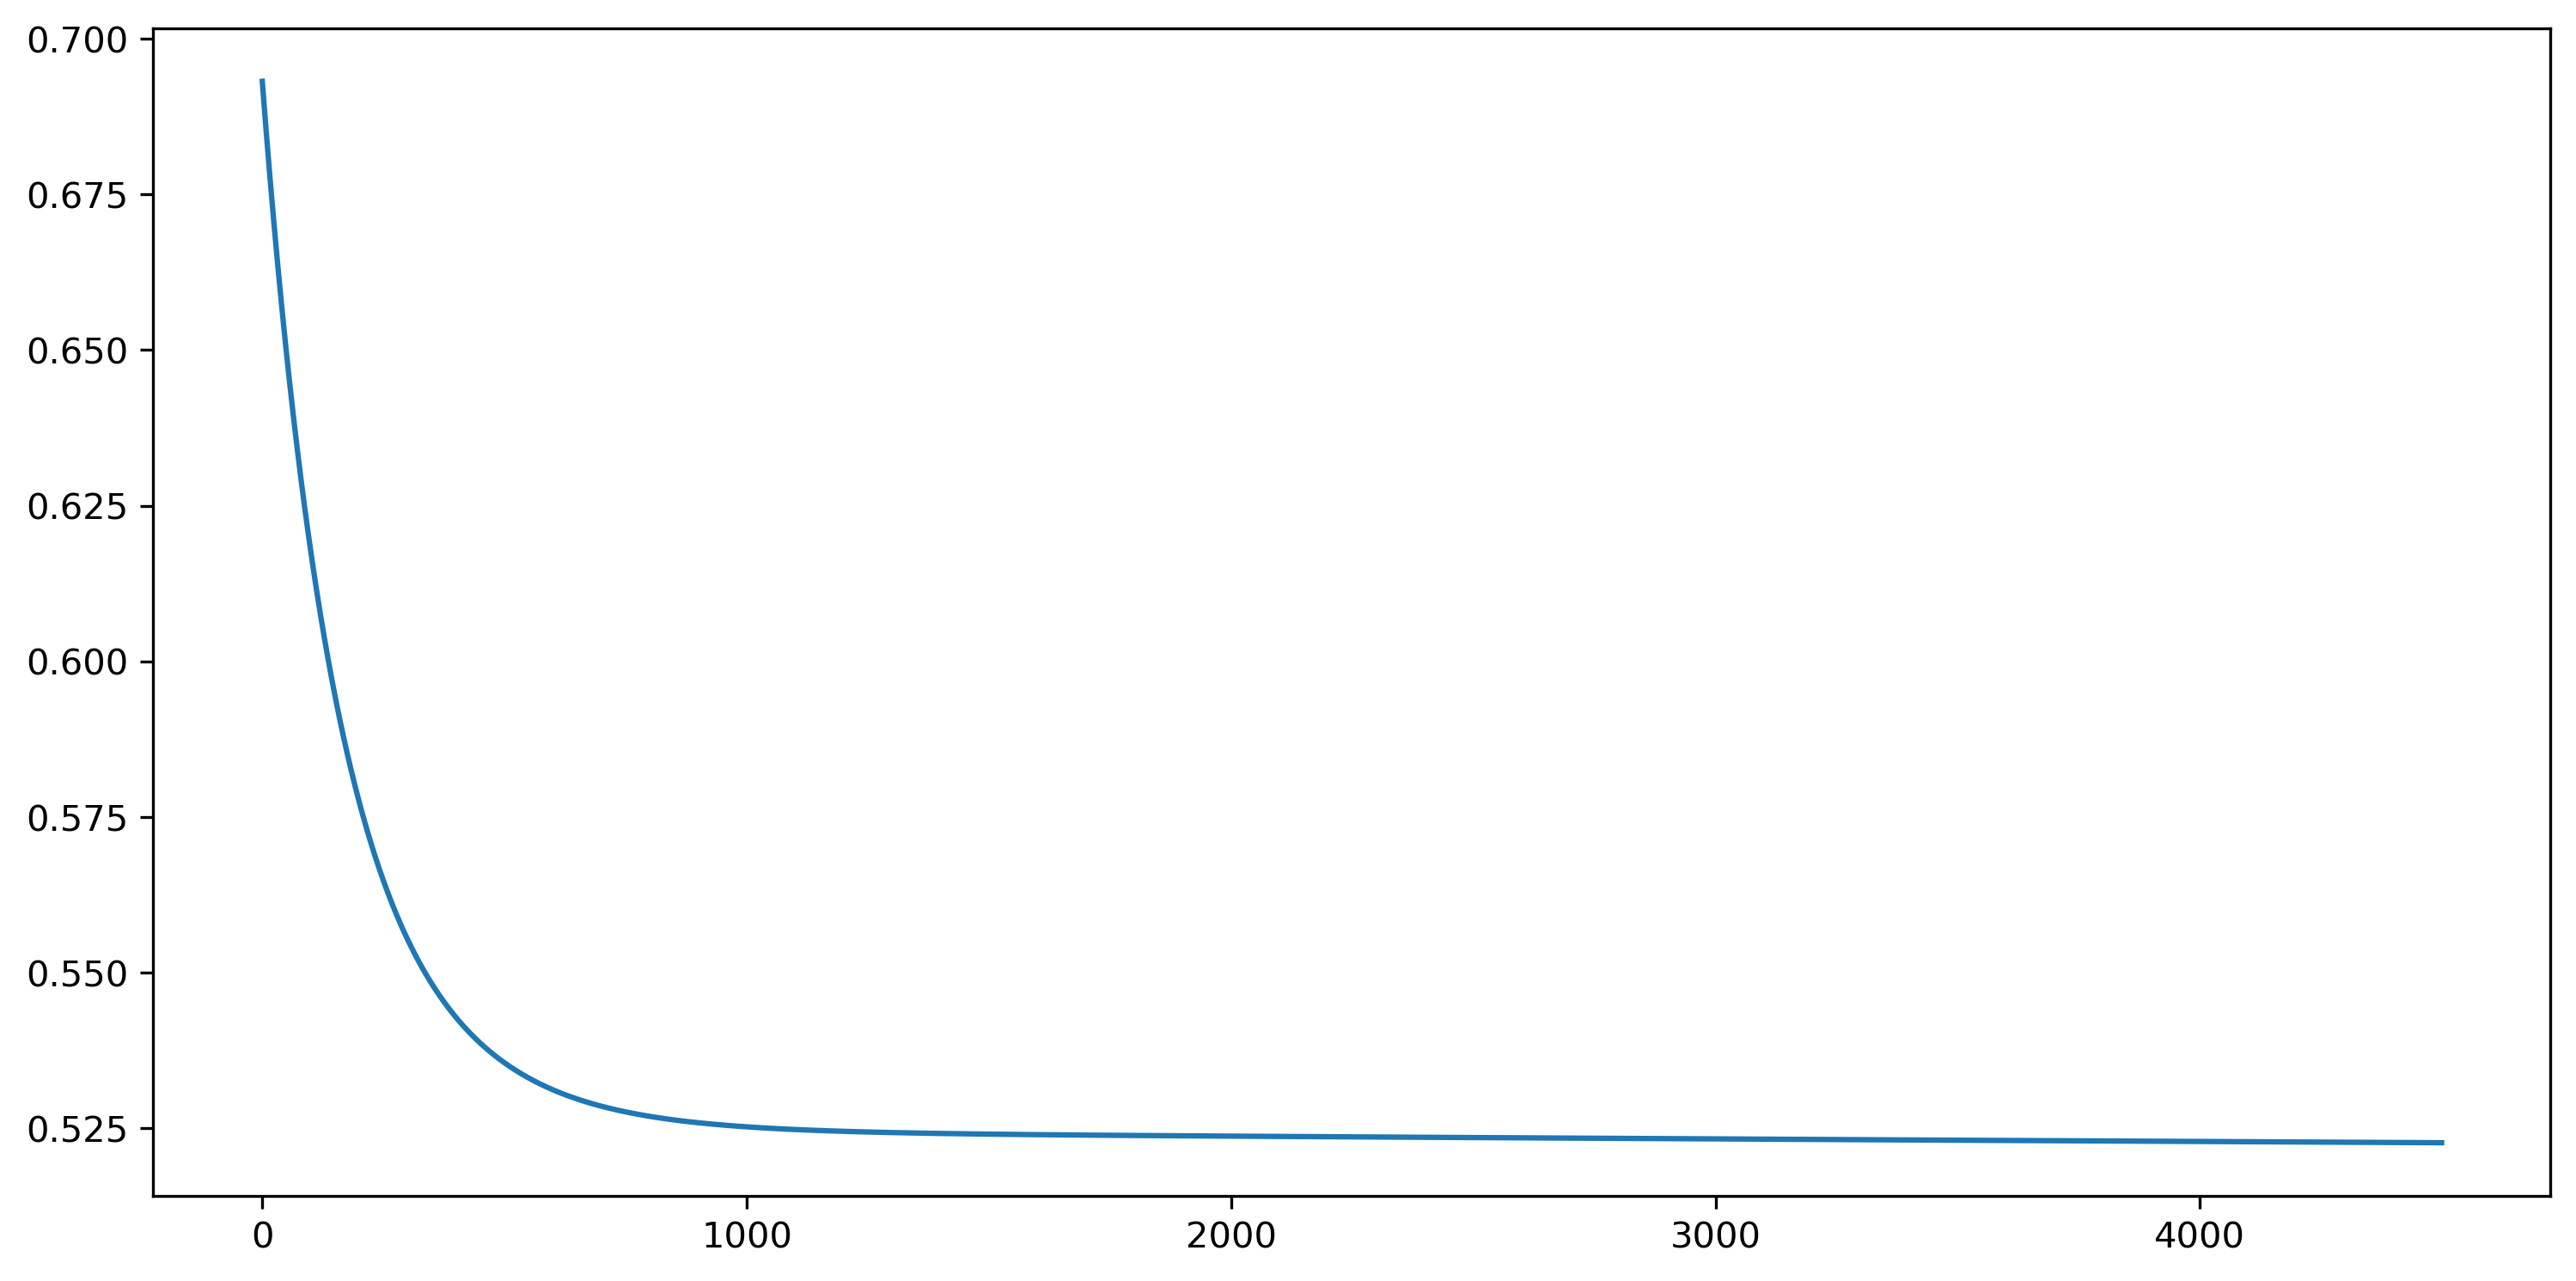

In [17]:
plt.figure(figsize=[12,6],dpi=300)
sns.lineplot(x=np.arange(4500),y=model.cost)
plt.show()

In [18]:
from sklearn.linear_model import LogisticRegression
model_ = LogisticRegression()
model_.fit(x,y)
model_.coef_,model_.intercept_

(array([[24.14238951, -2.81500615]]), array([0.01653744]))

In [19]:
model_.predict(minmax_normalizer(test[['Rainfall','MaxTemp']]))

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

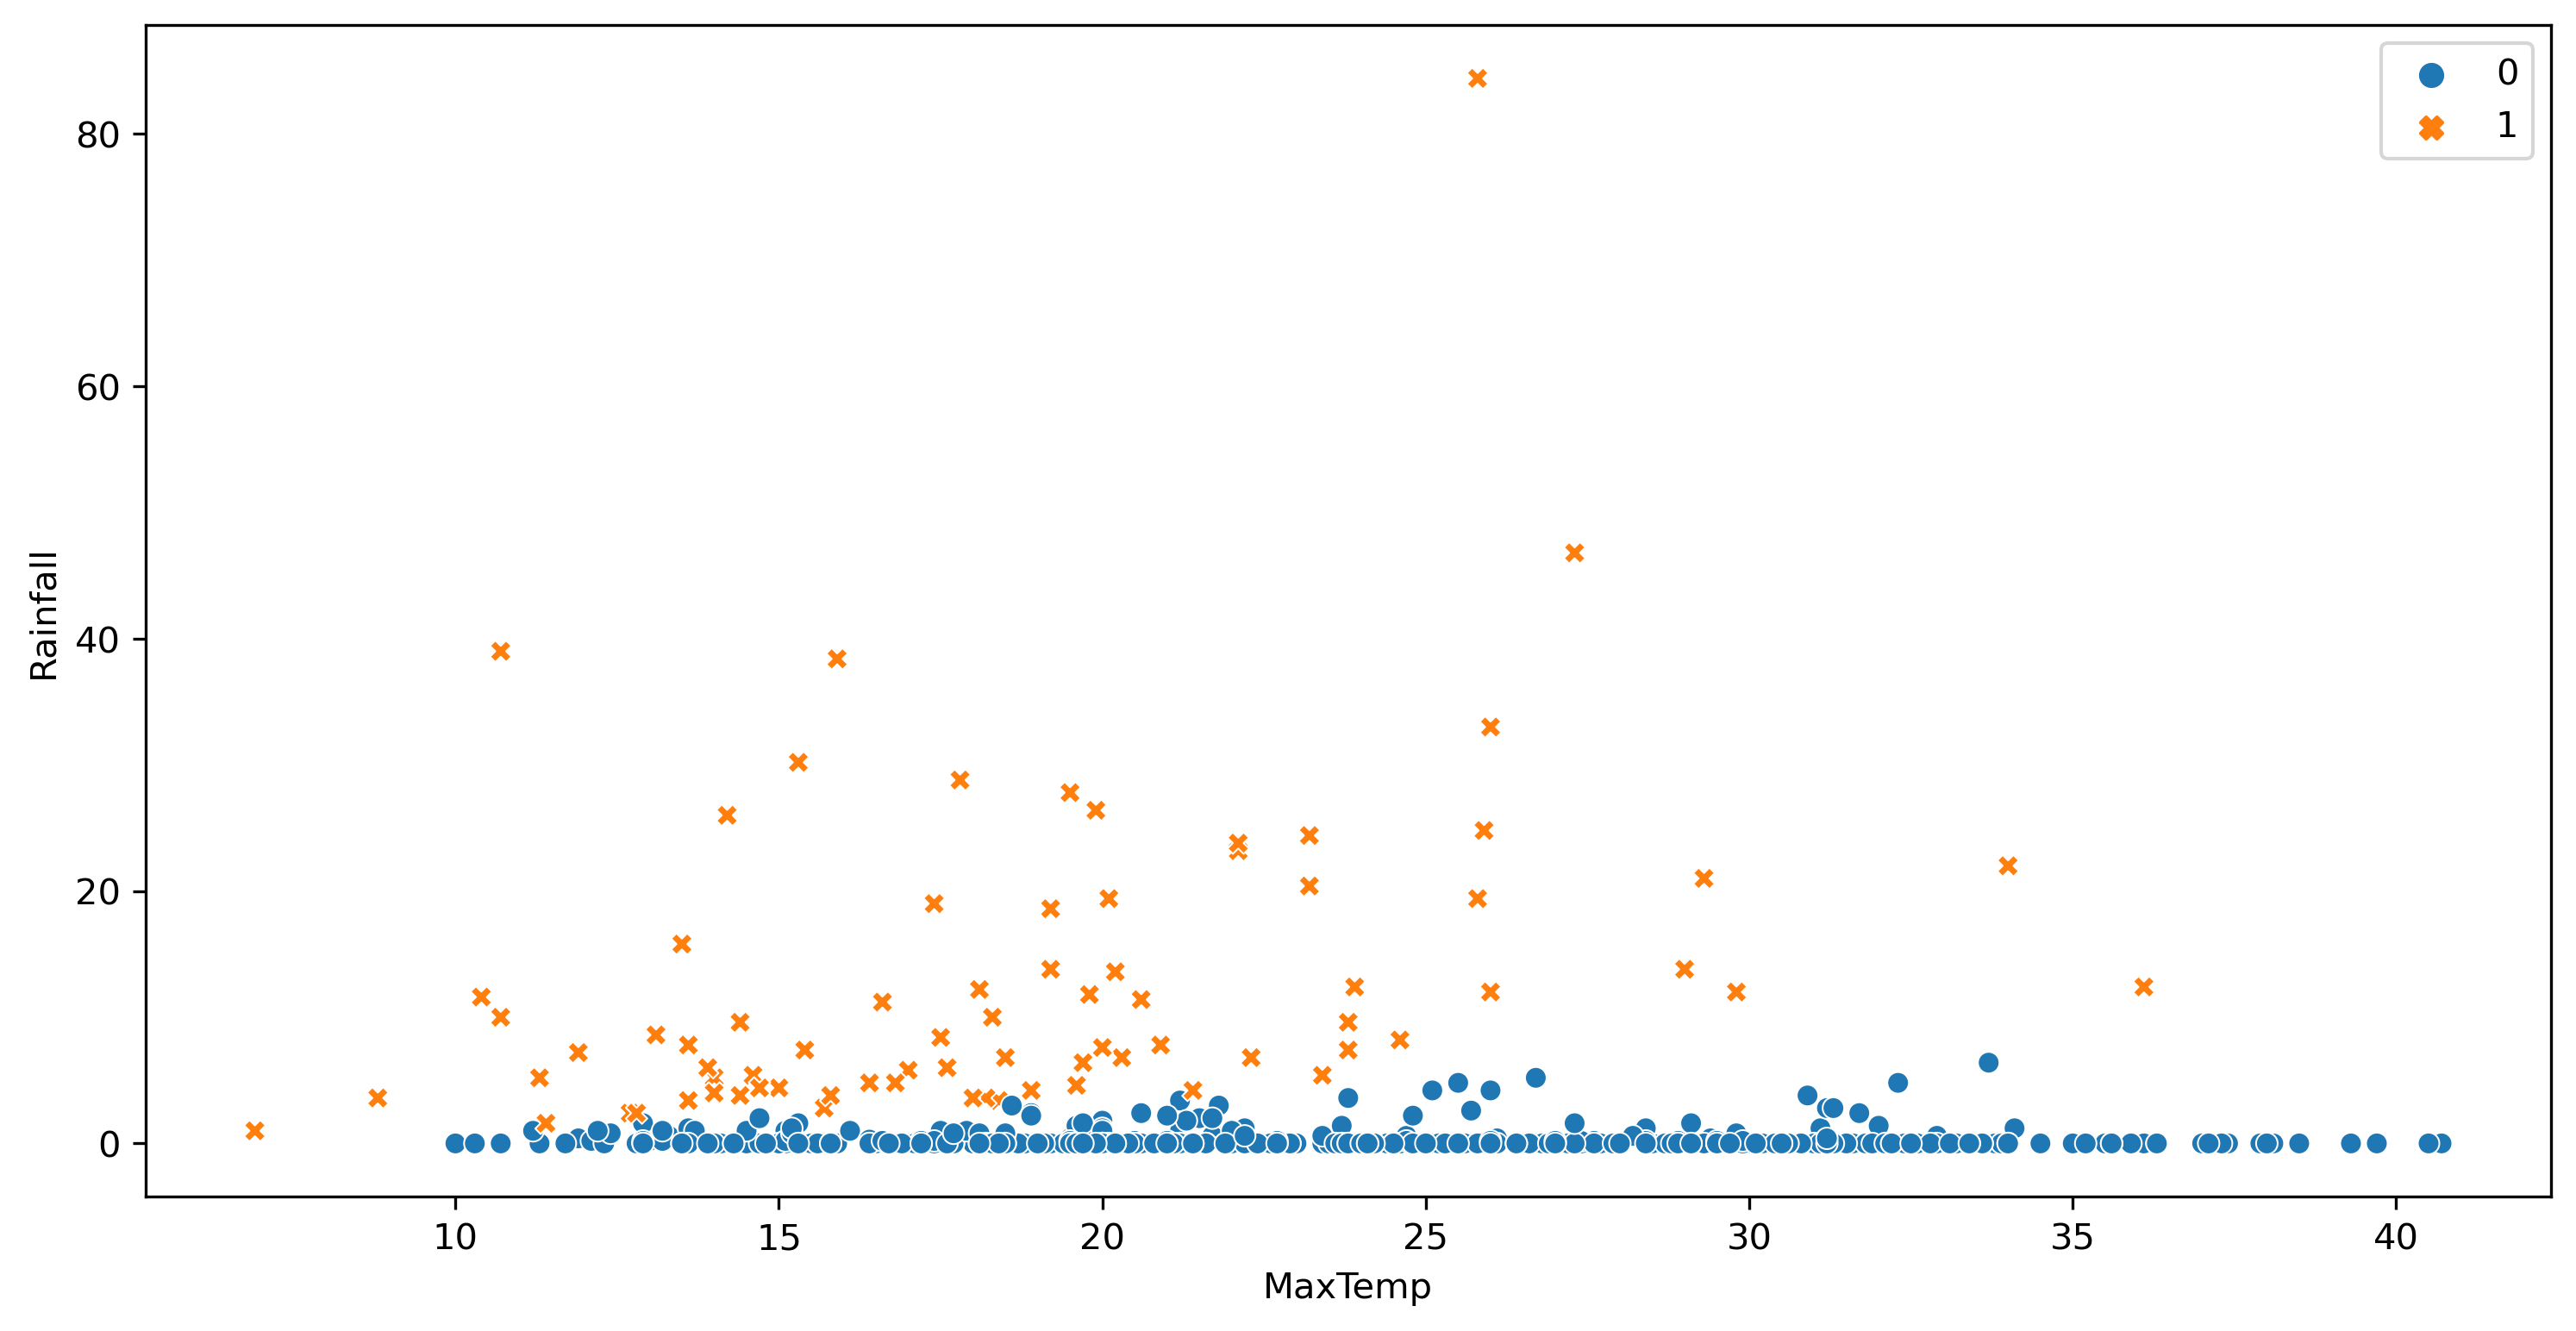

In [20]:
sample = test.sample(500,random_state=64)
label = model_.predict(minmax_normalizer(sample[['Rainfall','MaxTemp']]))
plt.figure(figsize=[12,6],dpi=300)
sns.scatterplot(x=sample.MaxTemp,y=sample.Rainfall,hue=label,style=label)
plt.show()